In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Fraud_check.csv')

In [4]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
data.shape

(600, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
dup=data.duplicated().value_counts()

In [9]:
dup

False    600
dtype: int64

In [10]:
data=pd.get_dummies(data,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [11]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [12]:
data['taxinc']=pd.cut(x=data['Taxable.Income'],bins=[0,30000,99620],labels=['Risky','Good'])

In [13]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,taxinc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [14]:
data.corr()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
Taxable.Income,1.000000,-0.064387,-0.001818,-0.049232,-0.100611,0.037910,0.070628
City.Population,-0.064387,1.000000,0.013135,0.079579,-0.007035,0.002087,-0.040098
Work.Experience,-0.001818,0.013135,1.000000,-0.005362,0.033347,-0.018123,-0.094559
Undergrad_YES,-0.049232,0.079579,-0.005362,1.000000,0.015120,0.028883,-0.000267
Marital.Status_Married,-0.100611,-0.007035,0.033347,0.015120,1.000000,-0.520317,0.016771
Marital.Status_Single,0.037910,0.002087,-0.018123,0.028883,-0.520317,1.000000,0.047014
Urban_YES,0.070628,-0.040098,-0.094559,-0.000267,0.016771,0.047014,1.000000


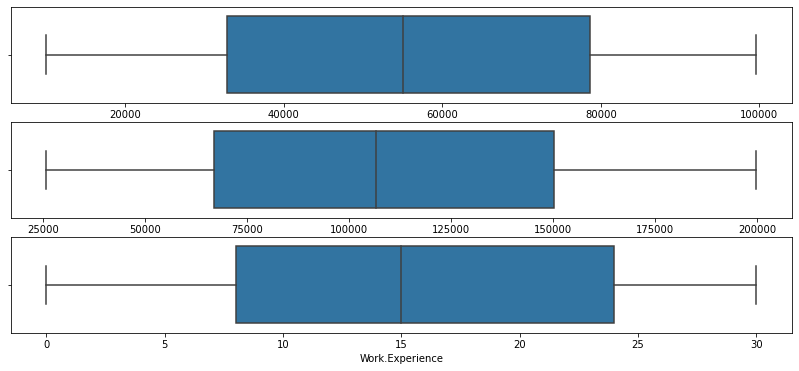

In [15]:
new=data.copy() 
fig,axes=plt.subplots(3,1,figsize=(14,6))
sns.boxplot(x='Taxable.Income',data=new,ax=axes[0])
sns.boxplot(x='City.Population',data=new,ax=axes[1])
sns.boxplot(x='Work.Experience',data=new,ax=axes[2])
plt.show()

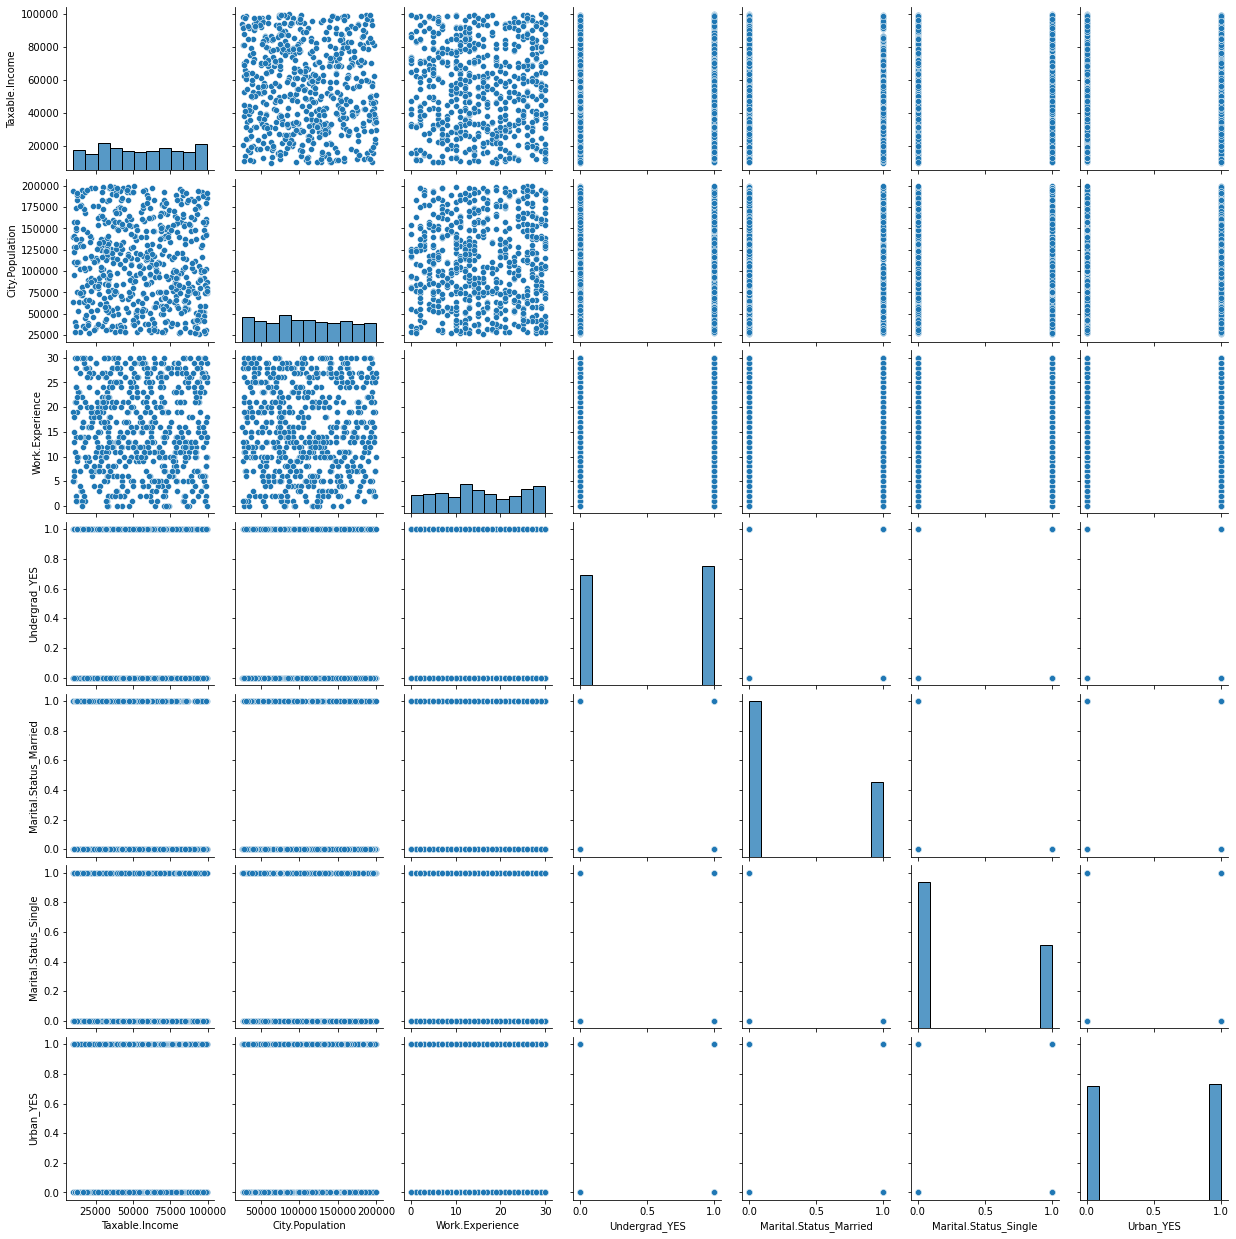

In [16]:
sns.pairplot(data)

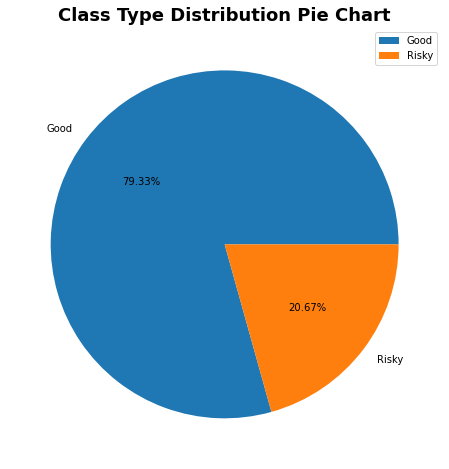

In [18]:
plt.figure(figsize = (15,8))
plt.pie(data['taxinc'].value_counts(),labels=data['taxinc'].unique(),
        autopct='%.2f%%')
plt.legend(loc='upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [19]:
data['Undergrad_YES'].value_counts()

1    312
0    288
Name: Undergrad_YES, dtype: int64

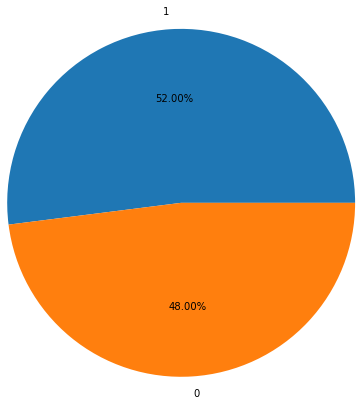

In [20]:
label=['1','0']
plt.pie(data['Undergrad_YES'].value_counts(),labels=label,radius=2,autopct='%.2f%%')
plt.ylabel(" ")
plt.show()

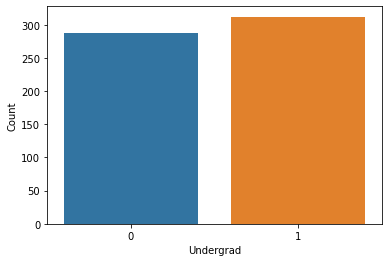

In [21]:
sns.countplot('Undergrad_YES',data=data)
plt.xlabel('Undergrad')
plt.ylabel('Count')
plt.show()

In [22]:
data['Marital.Status_Married'].value_counts()

0    406
1    194
Name: Marital.Status_Married, dtype: int64

In [23]:
data['Marital.Status_Single'].value_counts()

0    383
1    217
Name: Marital.Status_Single, dtype: int64

In [26]:
data['Urban_YES'].value_counts()

1    302
0    298
Name: Urban_YES, dtype: int64

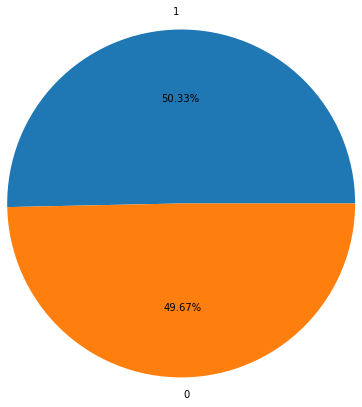

In [27]:
label=['1','0']
plt.pie(data['Urban_YES'].value_counts(),labels=label,radius=2,autopct='%.2f%%')
plt.ylabel(" ")
plt.show()

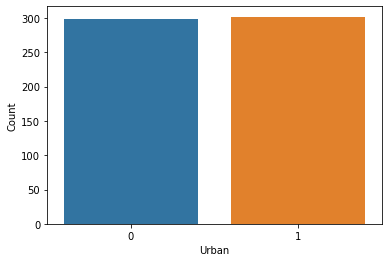

In [28]:
sns.countplot('Urban_YES',data=data)
plt.xlabel('Urban')
plt.ylabel('Count')
plt.show()

In [30]:
data['taxinc'].value_counts()

Good     476
Risky    124
Name: taxinc, dtype: int64

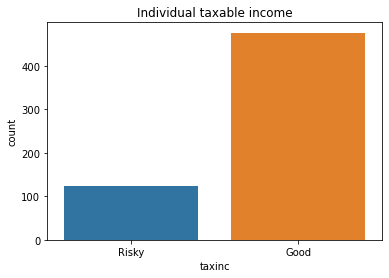

In [31]:
sns.countplot('taxinc',data=data)
plt.title('Individual taxable income')
plt.show()

In [32]:
x=data.iloc[:,1:7]
y=data.iloc[:,-1]

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [34]:
x

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


In [35]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: taxinc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [36]:
model= RandomForestClassifier(n_estimators=200,max_depth=20,min_samples_split=40,criterion='gini')

In [37]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_split=40, n_estimators=200)

In [40]:
model.score(x_train,y_train)

0.8071428571428572

In [41]:
model.score(x_test,y_test)

0.7611111111111111